# Defining custom operators

In this notebook we are going to show how you can define custom operators that can be used with any metaheuristic algorithm.

We will give a number of different ways of doing it, so you can choose which one is more appropiate for you.

In [9]:
import metaheuristic_designer as mhd
from metaheuristic_designer import GeneralSearch, Operator
from metaheuristic_designer.operators import OperatorLambda
from metaheuristic_designer.algorithms import HillClimb
from metaheuristic_designer.initializers import UniformVectorInitializer
from metaheuristic_designer.benchmarks import Sphere
from copy import copy
import numpy as np
import random

## With an already defined function

Let's say you have an already programmed function that will serve as a mutation or a cross operator for an algorithm. To use it in this framework, it will need to accept 4 parameters:
- An individual that we are attempting to modify.
- A population of individuals that are the parents selected for mutation.
- The objective function we are optimizing.
- A dictionary with other additional parameters.

Here's an example.


In [10]:
def mutate_custom(indiv, population, objfunc, **params):
    vector = indiv.genotype
    return vector + np.random.normal(0, params["F"], vector.shape)

To convert it into an operator, we will pass it to the ```OperatorLambda``` class to along with its name and other parameters.

In [11]:
operator = OperatorLambda(
    mutate_custom, name="GaussianNoise_lambda", params={"F": 1e-3}
)

Now we can directly use it with any algorithm we want, in this case, we will use it in a Hill Climb algorithm.

In [12]:
# Define the parameters of the optimization process
params = {"stop_cond": "time_limit", "time_limit": 10.0, "verbose": True, "v_timer": 2}

# Define the objective function
objfunc = Sphere(3)

# Define a population initialization module
pop_init = UniformVectorInitializer(
    objfunc.vecsize, objfunc.low_lim, objfunc.up_lim, pop_size=1
)

# Instanciate the newly created algorithm
algorithm = HillClimb(pop_init, operator)

# Define a Search method
search = GeneralSearch(objfunc, algorithm, params)

# Optimize the objective function
best_solution, best_fitness = search.optimize()

Initializing optimization of Sphere function using HillClimb
------------------------------------------------------------

Optimizing Sphere function using HillClimb:
	Real time Spent: 0.0 s
	CPU time Spent:  0.0 s
	Generation: 0
	Best fitness: 5415.286292004781
	Evaluations of fitness: 1



Optimizing Sphere function using HillClimb:
	Real time Spent: 2.0 s
	CPU time Spent:  2.0 s
	Generation: 133069
	Best fitness: 412.2064937741036
	Evaluations of fitness: 133070

Optimizing Sphere function using HillClimb:
	Real time Spent: 4.0 s
	CPU time Spent:  4.0 s
	Generation: 259371
	Best fitness: 1.2397215290188667e-09
	Evaluations of fitness: 259372

Optimizing Sphere function using HillClimb:
	Real time Spent: 6.0 s
	CPU time Spent:  6.0 s
	Generation: 392311
	Best fitness: 1.1174567301937887e-09
	Evaluations of fitness: 392312

Optimizing Sphere function using HillClimb:
	Real time Spent: 8.0 s
	CPU time Spent:  8.0 s
	Generation: 525680
	Best fitness: 1.1174567301937887e-09
	Evaluations of fitness: 525681



Best solution: [ 4.43236770e-06 -2.22897807e-06  2.18093450e-05]
Solution fitness: 5.002617550341376e-10

Number of generations: 658842
Real time spent: 10.00002s
CPU time spent: 9.99193s
Number of fitness evaluations: 658843
Best fitness: 5.002617550341376e-10


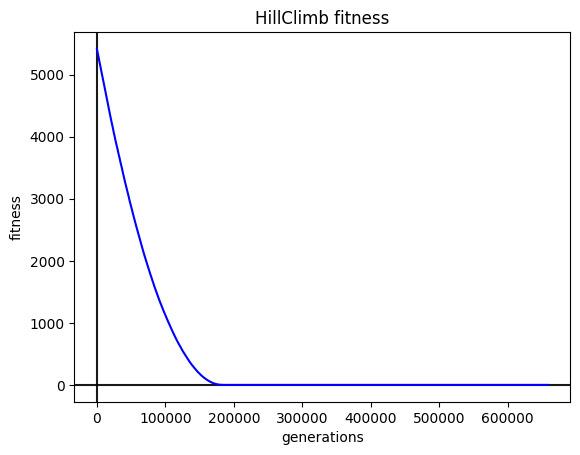

In [13]:
print(f"Best solution: {best_solution}")
print(f"Solution fitness: {best_fitness}\n")
search.display_report()

## With an operator class

If we want a little bit more control of how our operator will be applied, we can make a class that inherits from the base ```Operator``` class.

We will need to implement the ```evolve``` method, which will receive a number of parameters shown below.

In [14]:
class OperatorCustom(Operator):
    def __init__(self, sigma, params=None, name=None):
        self.sigma = sigma
        super().__init__(params, name)

    def evolve(self, indiv, population, objfunc, global_best, initializer):
        # It is good practice to always make a copy of the individual to ensure that we don't
        # modify it directly
        new_indiv = copy(indiv)

        # We apply a mutation to the individual
        vector = new_indiv.genotype
        new_indiv.genotype = vector + np.random.normal(0, self.sigma, vector.shape)

        return new_indiv


op_custom = OperatorCustom(1e-3, name="GaussianNoise_Class")
op_custom.name

'GaussianNoise_Class'

We can once again use this operator as normal.

In [17]:
# Define the parameters of the optimization process
params = {"stop_cond": "time_limit", "time_limit": 10.0, "verbose": True, "v_timer": 2}

# Define the objective function
objfunc = Sphere(3)

# Define a population initialization module
pop_init = UniformVectorInitializer(
    objfunc.vecsize, objfunc.low_lim, objfunc.up_lim, pop_size=1
)

# Instanciate the newly created algorithm
algorithm = HillClimb(pop_init, operator)

# Define a Search method
search = GeneralSearch(objfunc, algorithm, params)

# Optimize the objective function
best_solution, best_fitness = search.optimize()

Initializing optimization of Sphere function using HillClimb
------------------------------------------------------------

Optimizing Sphere function using HillClimb:
	Real time Spent: 0.0 s
	CPU time Spent:  0.0 s
	Generation: 0
	Best fitness: 4837.711925988624
	Evaluations of fitness: 1

Optimizing Sphere function using HillClimb:
	Real time Spent: 2.0 s
	CPU time Spent:  2.0 s
	Generation: 126770
	Best fitness: 360.528564563992
	Evaluations of fitness: 126771

Optimizing Sphere function using HillClimb:
	Real time Spent: 4.0 s
	CPU time Spent:  4.0 s
	Generation: 257540
	Best fitness: 9.136899843218854e-10
	Evaluations of fitness: 257541

Optimizing Sphere function using HillClimb:
	Real time Spent: 6.0 s
	CPU time Spent:  6.0 s
	Generation: 388027
	Best fitness: 9.136899843218854e-10
	Evaluations of fitness: 388028

Optimizing Sphere function using HillClimb:
	Real time Spent: 8.0 s
	CPU time Spent:  8.0 s
	Generation: 521886
	Best fitness: 1.0248925258923705e-10
	Evaluations of fi

Best solution: [ 8.06079626e-06  3.11855865e-06 -5.27137631e-06]
Solution fitness: 1.0248925258923705e-10

Number of generations: 653847
Real time spent: 10.00002s
CPU time spent: 9.99331s
Number of fitness evaluations: 653848
Best fitness: 1.0248925258923705e-10


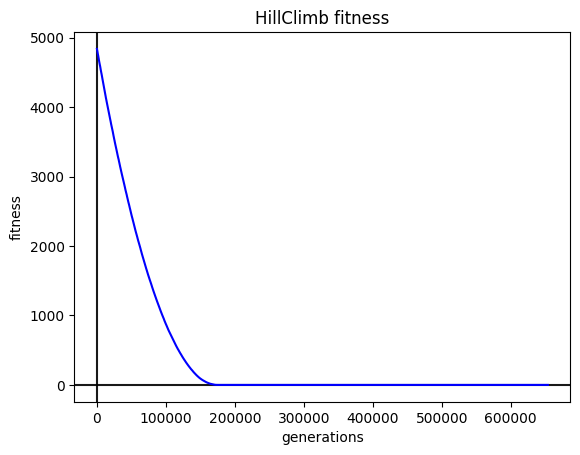

In [18]:
print(f"Best solution: {best_solution}")
print(f"Solution fitness: {best_fitness}\n")
search.display_report()